In [48]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV

In [49]:
from sklearn.utils import resample

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             confusion_matrix,recall_score)

In [51]:
from sklearn.dummy import DummyClassifier

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Mushroom Models

In [53]:
df = pd.read_csv('mushrooms_df.csv')

In [54]:
df_dummies=pd.read_csv('df_dummies.csv')

In [55]:
features_base = df_dummies[['cap_shape_c', 'cap_shape_f', 'cap_shape_k',
       'cap_shape_s', 'cap_shape_x', 'cap_surface_g', 'cap_surface_s',
       'cap_surface_y', 'cap_color_c', 'cap_color_e', 'cap_color_g',
       'cap_color_n', 'cap_color_p', 'cap_color_r', 'cap_color_u',
       'cap_color_w', 'cap_color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill_attachment_f',
       'gill_spacing_w', 'gill_size_n', 'gill_color_e', 'gill_color_g',
       'gill_color_h', 'gill_color_k', 'gill_color_n', 'gill_color_o',
       'gill_color_p', 'gill_color_r', 'gill_color_u', 'gill_color_w',
       'gill_color_y', 'stalk_shape_t', 'stalk_root_c', 'stalk_root_e',
       'stalk_root_m', 'stalk_root_r', 'stalk_surface_above_ring_k',
       'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y',
       'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s',
       'stalk_surface_below_ring_y', 'stalk_color_above_ring_c',
       'stalk_color_above_ring_e', 'stalk_color_above_ring_g',
       'stalk_color_above_ring_n', 'stalk_color_above_ring_o',
       'stalk_color_above_ring_p', 'stalk_color_above_ring_w',
       'stalk_color_above_ring_y', 'stalk_color_below_ring_c',
       'stalk_color_below_ring_e', 'stalk_color_below_ring_g',
       'stalk_color_below_ring_n', 'stalk_color_below_ring_o',
       'stalk_color_below_ring_p', 'stalk_color_below_ring_w',
       'stalk_color_below_ring_y', 'veil_color_o', 'veil_color_w',
       'veil_color_y', 'ring_number_o', 'ring_number_t', 'ring_type_f',
       'ring_type_l', 'ring_type_n', 'ring_type_p', 'spore_print_color_h',
       'spore_print_color_k', 'spore_print_color_n', 'spore_print_color_o',
       'spore_print_color_r', 'spore_print_color_u', 'spore_print_color_w',
       'spore_print_color_y', 'population_c', 'population_n', 'population_s',
       'population_v', 'population_y', 'habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w']]
target= df_dummies.edible_poisonous_p

In [56]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit(features_base)
column_names = poly.get_feature_names(features_base.columns)
df_poly= pd.DataFrame(poly.transform(features_base), columns=column_names)

ccc = list(df_poly.columns)
len(ccc)

4560

In [57]:
#creating test train split out of our dataframe
X_train_base, X_test_base, y_train_base, y_test = train_test_split(df_poly, 
                                                                   target, 
                                                                   random_state=14,
                                                                   test_size=0.2)


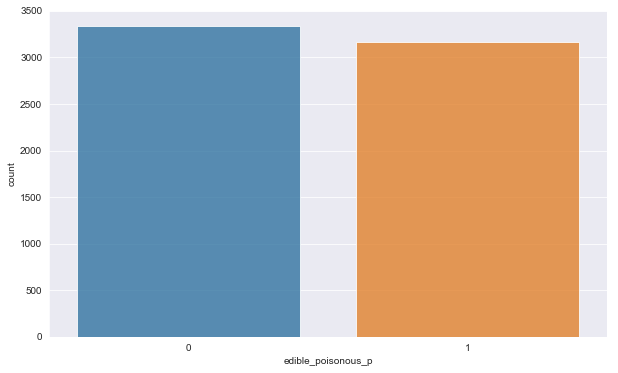

In [58]:
# plot class imbalance
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_base, alpha=0.8)

Target class is pretty balanced and there are enough data points so no need to upsample

## Logistic Regression

In [59]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.01, 0.02, 0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [16]:
# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv = 5 , scoring='f1') 

In [33]:
# Fit grid search
model = clf_gs.fit(X_train_base, y_train_base)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [34]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [40]:
y_pred_train = model.best_estimator_.predict(X_train_base)

y_pred_test = model.best_estimator_.predict(X_test_base)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train_base, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 1.0


In [41]:
#fix this. also--what is this?

# model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

# model_params.sort(key = lambda x: abs(x[1]), reverse=True)
# model_params

In [42]:
#check overall metrics on test data
print('Accuracy:',accuracy_score(y_test, y_pred_test))
print('Precision:',precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1:', f1_score(y_test, y_pred_test))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [43]:
#plot confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[872   0]
 [  0 753]]


<h1> Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# run a RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [46]:
rfc.fit(X_train_base, y_train_base)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [27]:
rfc_pred = rfc.predict(X_test_base)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  1.0
Test F1 score:  1.0


In [28]:
len(y_test)

1625

In [29]:
len(y_train_base)

6499

In [47]:
len(y_pred_train)

6499

In [31]:
len(rfc_pred)

1625